In [1]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats as st
from configparser import ConfigParser
import statsmodels.stats.multicomp as mc
from tools import connect, group, sum_by_var, count_unique, StatsForGraphs, Unpaired_ttest, MultipleComparison_ttest, Multiple_ttest, OneWayAnova, MathTextSciFormatter

Run this cell to connect to the database, load the data from the desired table and create a pandas data frame from it

In [2]:
# Connect to database
cursor = connect()

# Load data from table V12_Platinum_158_dataset_All_stages
cursor.execute("SELECT * FROM v12_platinum_158_dataset")

# Obtain all rows of data table
v12_plat_158 = cursor.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cursor.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

Connecting to the PostgreSQL database...


,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle
0,Col-0,1-II,290_7x,290_D,4163.0,L2,309.700,I
1,Col-0,1-II,290_7x,290_D,2154.0,L2,281.825,I
2,Col-0,1-II,290_7x,290_D,63.0,L2,237.621,I
3,Col-0,1-II,290_7x,290_D,3838.0,L2,232.475,I
4,Col-0,1-II,290_7x,290_D,1192.0,L1,212.399,I


In [3]:
df_by_stage = group(df, ['stage'])
count_by_stage = count_unique(df_by_stage, 'ovule_id')
count_by_stage.head()

,stage,ovule_id,n
0,1-I,783_A,46
1,1-I,784_A,38
2,1-I,784_B,45
3,1-I,784_D,39
4,1-I,785_A,39


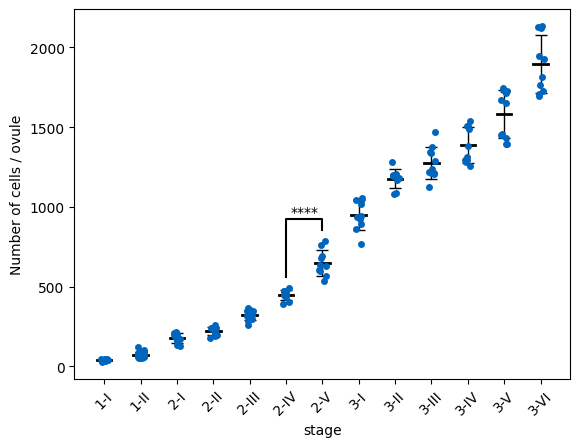

In [7]:
# Box plot of number of cells per ovule over stage

# Choose colors for boxplot
# PROPS = {
#     'boxprops':{'facecolor':'None', 'edgecolor':'black'},
#     'medianprops':{'color':'black'},
#     'whiskerprops':{'color':'black'}
# }

# Get statistics (mean, standard deviation)
stats = StatsForGraphs(count_by_stage, 'stage', 'n')
means, stds = stats.compute_stats()

# Box plots
# sns.boxplot(data=count_cells_by_stage, x='stage', y='n', showfliers=False, **PROPS)
# sns.barplot(data=count_cells_by_stage, x='stage', y='n', ci='sd', color='lightblue')
plt.errorbar(count_by_stage['stage'].unique(), means, yerr=stds, linestyle='None', lw=1.0, fmt='None', capsize=4.0, color='black')

for idx, stage in enumerate(count_by_stage['stage'].unique()):
    plt.plot([idx-0.2,idx+0.2], [means[idx],means[idx]], color='black', lw=2.0)

# Scatter plots
sns.stripplot(data=count_by_stage, x='stage', y='n', color='#0065bd', alpha=1.0)

# Statistical annotation for unpaired t-test
ttest = Unpaired_ttest(count_by_stage, var='stage', category=['2-IV', '2-V'], value='n', col='black', h=70)
ast = ttest.perform_ttest()
ttest.graph_annotate(ast)

# Change label of y-axis
plt.ylabel('Number of cells / ovule')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

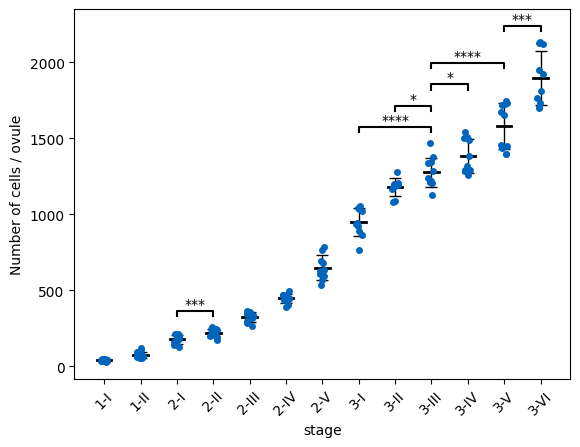

In [9]:
# Get statistics (mean, standard deviation)
stats = StatsForGraphs(count_by_stage, 'stage', 'n')
means, stds = stats.compute_stats()

# Box plots
plt.errorbar(count_by_stage['stage'].unique(), means, yerr=stds, linestyle='None', lw=1.0, fmt='None', capsize=4.0, color='black')

for idx, stage in enumerate(count_by_stage['stage'].unique()):
    plt.plot([idx-0.2,idx+0.2], [means[idx],means[idx]], color='black', lw=2.0)

# Scatter plots
sns.stripplot(data=count_by_stage, x='stage', y='n', color='#0065bd', alpha=1.0)

# Statistical annotation for multiple t-test (unpaired, parametric)
pairs = [('2-I', '2-II'), ('3-I', '3-III'), ('3-II', '3-III'), ('3-III', '3-IV'), ('3-III', '3-V'), ('3-V', '3-VI')]
ttest = Multiple_ttest(count_by_stage, var='stage', value='n', pairs=pairs, col='black', h=70)
ast = ttest.perform_ttest()
ttest.graph_annotate(ast)

# Change label of y-axis
plt.ylabel('Number of cells / ovule')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

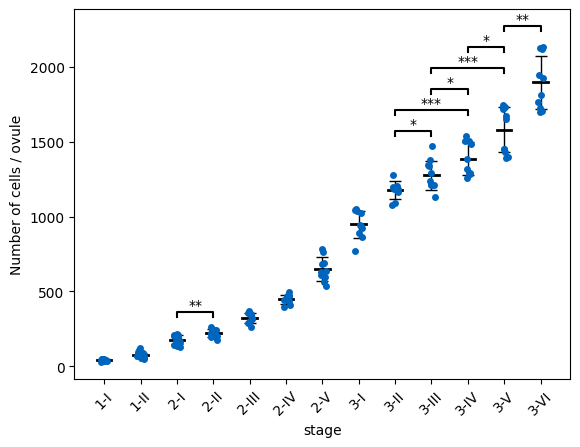

In [8]:
# Get statistics (mean, standard deviation)
stats = StatsForGraphs(count_by_stage, 'stage', 'n')
means, stds = stats.compute_stats()

# Box plots
plt.errorbar(count_by_stage['stage'].unique(), means, yerr=stds, linestyle='None', lw=1.0, fmt='None', capsize=4.0, color='black')

for idx, stage in enumerate(count_by_stage['stage'].unique()):
    plt.plot([idx-0.2,idx+0.2], [means[idx],means[idx]], color='black', lw=2.0)

# Scatter plots
sns.stripplot(data=count_by_stage, x='stage', y='n', color='#0065bd', alpha=1.0)

# Statistical annotation for multiple comparison t-test
ttest = MultipleComparison_ttest(count_by_stage, var='stage', value='n', method='holm-sidak', col='black', h=70)
pairs, pvalues, ast = ttest.perform_ttest()
ttest.graph_annotate(pairs, ast)

# Change label of y-axis
plt.ylabel('Number of cells / ovule')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

In [10]:
# One-way ANOVA
categories = ['3-II','3-III','3-IV']
anova_test = OneWayAnova(count_by_stage, var='stage', value='n', category=categories)
st, p = anova_test.perform_anova()
print(f'Statistic: {st}, p-value: {p}')

Statistic: 12.859638302912241, p-value: 0.0001092421548983739


In [16]:
# Compute total volume of ovule per stage
# Group by variables "stage", "ovule_id" and sum up the volume
ovule_volume_by_stage = group(df, ['stage', 'ovule_id'])
ovule_volume_by_stage = sum_by_var(ovule_volume_by_stage, 'cell_vol', 'volume')
ovule_volume_by_stage.head()

,stage,ovule_id,volume
0,1-I,783_A,5273.1159
1,1-I,784_A,5118.4659
2,1-I,784_B,5755.6761
3,1-I,784_D,5650.7137
4,1-I,785_A,5501.2369


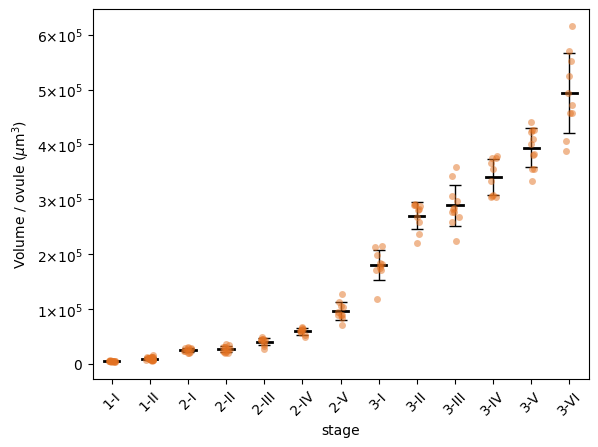

In [17]:
# Box plot of total volume of ovule over stage

# Convert variable "cell_vol" from type decimal to type float
ovule_volume_by_stage['volume'] = ovule_volume_by_stage['volume'].astype('float')

# Init plot
fig, ax = plt.subplots()

# PROPS = {
#     'boxprops':{'facecolor':'none', 'edgecolor':'black'},
#     'medianprops':{'color':'black'}
# }

# Get statistics (mean, standard deviation)
stats = StatsForGraphs(ovule_volume_by_stage, 'stage', 'volume')
means, stds = stats.compute_stats()

# Box plots
# sns.boxplot(data=ovule_volume_by_stage, x='stage', y='cell_vol', color='white', showfliers=False, whis=0.0, **PROPS)
# sns.barplot(data=ovule_volume_by_stage, x='stage', y='cell_vol', ci='sd', color='lightblue')
plt.errorbar(ovule_volume_by_stage['stage'].unique(), means, yerr=stds, linestyle='None', lw=1.0, fmt='None', capsize=4.0, color='black')

for idx, stage in enumerate(ovule_volume_by_stage['stage'].unique()):
    plt.plot([idx-0.2,idx+0.2], [means[idx],means[idx]], color='black', lw=2.0)

# Scatter plots
sns.stripplot(data=ovule_volume_by_stage, x='stage', y='volume', color='#e37222', alpha=0.5)

# Format with 2 decimal places
plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))

# Change label of y-axis
plt.ylabel('Volume / ovule ($\mu$m$^3$)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

In [4]:
# Compute overall number of cells and number of mitotic cells per ovule per stage
# Group by variables "stage" and count unique values in variable "ovule_id"
mcells_by_stage = df[df['cell_cycle'] == 'M']
mcells_by_stage = group(mcells_by_stage, ['stage'])
mcells_by_stage = count_unique(mcells_by_stage, 'ovule_id', 'n_mitotic')
mcells_by_stage.head()

,stage,ovule_id,n_mitotic
0,1-I,784_B,1
1,1-I,784_D,1
2,1-I,786_B,1
3,1-I,787_B,1
4,1-II,397_B,1


In [5]:
# Merge tables to display number of total cells and number of mitotic cells per ovule per stage

# Define variables by which to group
gr = ['ovule_id', 'stage']

# Merge DataFrames with a database-style join
count_by_stage = pd.merge(count_by_stage, mcells_by_stage, left_on=gr, right_on=gr, how='outer')

# Replace NaN values in variable "n_mitotic" by zero values and convert back to type "integer"
count_by_stage['n_mitotic'] = count_by_stage['n_mitotic'].fillna(0).astype('int64')

# Calculate ratio between overall number of cells and number of mitotic cells
count_by_stage['ratio'] = count_by_stage['n_mitotic'] / count_by_stage['n']

# Print data
count_by_stage.head()

,stage,ovule_id,n,n_mitotic,ratio
0,1-I,783_A,46,0,0.000000
1,1-I,784_A,38,0,0.000000
2,1-I,784_B,45,1,0.022222
3,1-I,784_D,39,1,0.025641
4,1-I,785_A,39,0,0.000000


In [18]:
# Load data from table V12_Platinum_158_dataset_All_stages
# Filter by early stages (1-I until 2-IV)

cursor.execute("SELECT * FROM v12_platinum_158_dataset WHERE stage IN ('1-I','1-II','2-I','2-II','2-III','2-IV');")

# Obtain all rows of data table
v12_plat_158_early = cursor.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cursor.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158_early)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle
0,Col-0,1-II,290_7x,290_D,4163.0,L2,309.700,I
1,Col-0,1-II,290_7x,290_D,2154.0,L2,281.825,I
2,Col-0,1-II,290_7x,290_D,63.0,L2,237.621,I
3,Col-0,1-II,290_7x,290_D,3838.0,L2,232.475,I
4,Col-0,1-II,290_7x,290_D,1192.0,L1,212.399,I


In [19]:
# Count unique values in variable "stage"
by_stage = count_unique(df, 'stage')
by_stage.head()

,stage,n
0,1-I,554
1,1-II,2071
2,2-I,1946
3,2-II,2868
4,2-III,3241


In [20]:
# Load data from table V12_Platinum_158_dataset_All_stages
# Filter by later stages (2-II until 3-VI)

cursor.execute("SELECT * FROM v12_platinum_158_dataset WHERE stage IN ('2-II','2-III','2-IV','2-V','3-I','3-II','3-III','3-IV','3-V','3-VI');")

# Obtain all rows of data table
v12_plat_158_late = cursor.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cursor.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158_late)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle
0,Col-0,2-II,769,769,383.0,L2,836.147,I
1,Col-0,2-II,769,769,775.0,L3,407.212,I
2,Col-0,2-II,769,769,787.0,L3,319.006,I
3,Col-0,2-II,769,769,255.0,L3,310.791,I
4,Col-0,2-II,769,769,261.0,L2,279.569,M


In [21]:
# Count unique values in variable "stage"
by_stage = count_unique(df, 'stage')
by_stage.head()

,stage,n
0,2-II,2868
1,2-III,3241
2,2-IV,4471
3,2-V,6487
4,3-I,9481


In [6]:
# Load data from table V12_Platinum_158_dataset_All_stages
# Filter by specific stage and cell type/layer
# Adapt naming to chosen stage and cell type/layer

cursor.execute("SELECT * FROM v12_platinum_158_dataset WHERE stage='1-I' AND cell_type='L1'")

# Obtain all rows of data table
v12_plat_158_1I_L1 = cursor.fetchall()

# Obtain column names
colnames = [desc[0] for desc in cursor.description]

# Create pandas DataFrame from list of tuples
df = pd.DataFrame(v12_plat_158_1I_L1)

# Add column names to respective columns
df.columns = colnames

# Display first five rows of pandas DataFrame
df.head()

,genotype,stage,pistil_id,ovule_id,cell_id,cell_type,cell_vol,cell_cycle
0,Col-0,1-I,783_5x,783_A,2180,L1,205.062,I
1,Col-0,1-I,783_5x,783_A,1260,L1,186.779,I
2,Col-0,1-I,783_5x,783_A,1841,L1,179.353,I
3,Col-0,1-I,783_5x,783_A,102,L1,158.205,I
4,Col-0,1-I,783_5x,783_A,1181,L1,156.158,I


In [7]:
# Count number of cells per ovule filtered by a specific stage and cell type/layer
per_ovule = count_unique(df, ['stage','ovule_id','cell_type'])
per_ovule.head()

,stage,ovule_id,cell_type,n
0,1-I,783_A,L1,30
1,1-I,784_A,L1,23
2,1-I,784_B,L1,29
3,1-I,784_D,L1,23
4,1-I,785_A,L1,23
